## PART 1 : PREPROCESSING

---


## PART 2 : REGRESSION

---


## PART 3 : CLASSIFICATION

---


## PART 4 : CLUSTERING

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

plt.style.use("default")
sns.set_palette("husl")

print("="*70)
print("ENERGY CONSUMPTION AND EFFICIENCY ANALYSIS PROJECT")
print("="*70)

ENERGY CONSUMPTION AND EFFICIENCY ANALYSIS PROJECT


In [2]:
import pandas as pd

# ============================================================
# LOAD DATASET ONCE
# ============================================================
df = pd.read_csv("Household energy unit data.csv") 
print("Dataset Shape:", df.shape)
print("\nFirst rows:")
print(df.head())

Dataset Shape: (1000, 9)

First rows:
   num_rooms  num_people  housearea  is_ac  is_tv  is_flat  num_children  \
0          3           3     742.57      1      1        1             2   
1          1           5     952.99      0      1        0             1   
2          3           1     761.44      1      1        1             0   
3          0           5     861.32      1      1        0             0   
4          1           8     731.61      0      1        0             2   

   is_urban       units  
0         0  134.731117  
1         1  125.315527  
2         0  123.047874  
3         0   80.046162  
4         1  128.429094  


In [3]:
# ============================================================
# STEP 1: FEATURE ENGINEERING
# ============================================================
print("\nSTEP 1: FEATURE ENGINEERING")
print("-"*50)

# 1. Total Energy Consumption
df["Total_Energy_kWh"] = df["units"]

# 2. Energy Consumption per Person
df["Energy_per_Person"] = df["units"] / df["num_people"].replace(0, 1)

# 3. Energy Intensity (kWh per square meter)
df["Energy_per_SqM"] = df["units"] / df["housearea"]

print("Features created: Total_Energy_kWh, Energy_per_Person, Energy_per_SqM")
print(df[["Total_Energy_kWh", "Energy_per_Person", "Energy_per_SqM"]].head())


STEP 1: FEATURE ENGINEERING
--------------------------------------------------
Features created: Total_Energy_kWh, Energy_per_Person, Energy_per_SqM
   Total_Energy_kWh  Energy_per_Person  Energy_per_SqM
0        134.731117          44.910372        0.181439
1        125.315527          25.063105        0.131497
2        123.047874         123.047874        0.161599
3         80.046162          16.009232        0.092934
4        128.429094          16.053637        0.175543


In [4]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   num_rooms  num_people  housearea  is_ac  is_tv  is_flat  num_children  \
0          3           3     742.57      1      1        1             2   
1          1           5     952.99      0      1        0             1   
2          3           1     761.44      1      1        1             0   
3          0           5     861.32      1      1        0             0   
4          1           8     731.61      0      1        0             2   

   is_urban       units  Total_Energy_kWh  Energy_per_Person  Energy_per_SqM  
0         0  134.731117        134.731117          44.910372        0.181439  
1         1  125.315527        125.315527          25.063105        0.131497  
2         0  123.047874        123.047874         123.047874        0.161599  
3         0   80.046162         80.046162          16.009232        0.092934  
4         1  128.429094        128.429094          16.053637        0.175543  


In [5]:
df.shape

(1000, 12)

In [6]:
count_greater_than_100 = df[df["Energy_per_Person"] < 35].shape[0]
print("Count of values greater than 100:", count_greater_than_100)


Count of values greater than 100: 750


In [7]:
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)


Duplicate rows:
 Empty DataFrame
Columns: [num_rooms, num_people, housearea, is_ac, is_tv, is_flat, num_children, is_urban, units, Total_Energy_kWh, Energy_per_Person, Energy_per_SqM]
Index: []


In [8]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_rooms          1000 non-null   int64  
 1   num_people         1000 non-null   int64  
 2   housearea          1000 non-null   float64
 3   is_ac              1000 non-null   int64  
 4   is_tv              1000 non-null   int64  
 5   is_flat            1000 non-null   int64  
 6   num_children       1000 non-null   int64  
 7   is_urban           1000 non-null   int64  
 8   units              1000 non-null   float64
 9   Total_Energy_kWh   1000 non-null   float64
 10  Energy_per_Person  1000 non-null   float64
 11  Energy_per_SqM     1000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB
None


In [9]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
         num_rooms   num_people    housearea        is_ac        is_tv  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.962000     4.897000   794.703420     0.376000     0.798000   
std       1.030348     2.007591   147.771736     0.484622     0.401693   
min      -1.000000    -1.000000   244.400000     0.000000     0.000000   
25%       1.000000     4.000000   691.037500     0.000000     1.000000   
50%       2.000000     5.000000   789.970000     0.000000     1.000000   
75%       3.000000     6.000000   892.955000     1.000000     1.000000   
max       5.000000    11.000000  1189.120000     1.000000     1.000000   

           is_flat  num_children     is_urban        units  Total_Energy_kWh  \
count  1000.000000   1000.000000  1000.000000  1000.000000       1000.000000   
mean      0.477000      1.078000     0.608000   123.597217        123.597217   
std       0.499721      0.934232     0.488441    27.106187         27.1061

In [10]:
# ============================================================
# STEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)
# ============================================================
print("\nSTEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)")
print("-"*50)

# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns



STEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)
--------------------------------------------------


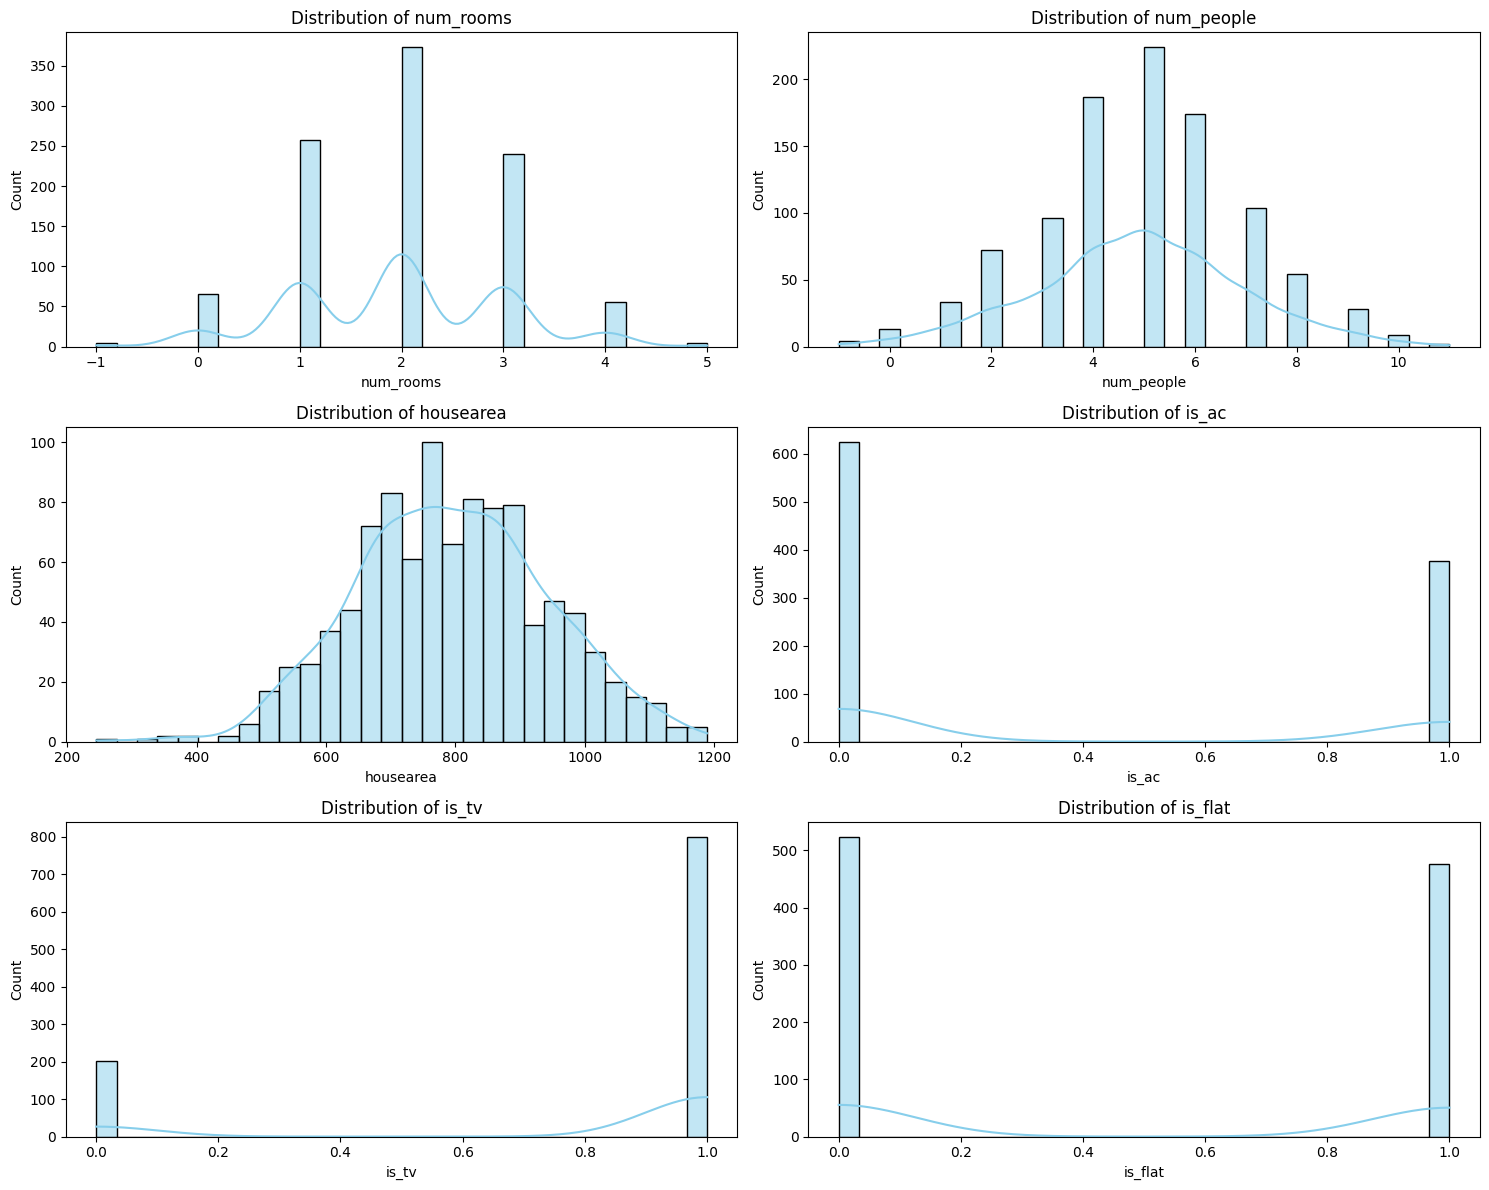

In [11]:
# --- Numerical Data Visualization ---
# 1. Histograms + KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

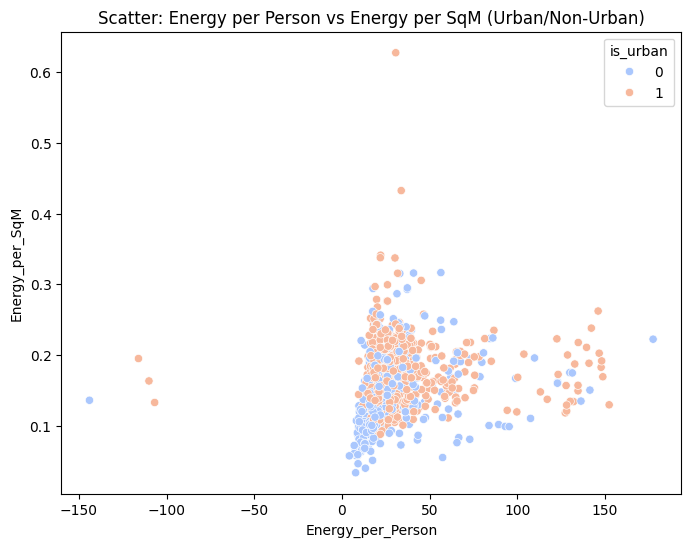

In [12]:
# 4. Scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Energy_per_Person", y="Energy_per_SqM", data=df, hue="is_urban", palette="coolwarm")
plt.title("Scatter: Energy per Person vs Energy per SqM (Urban/Non-Urban)")
plt.show()

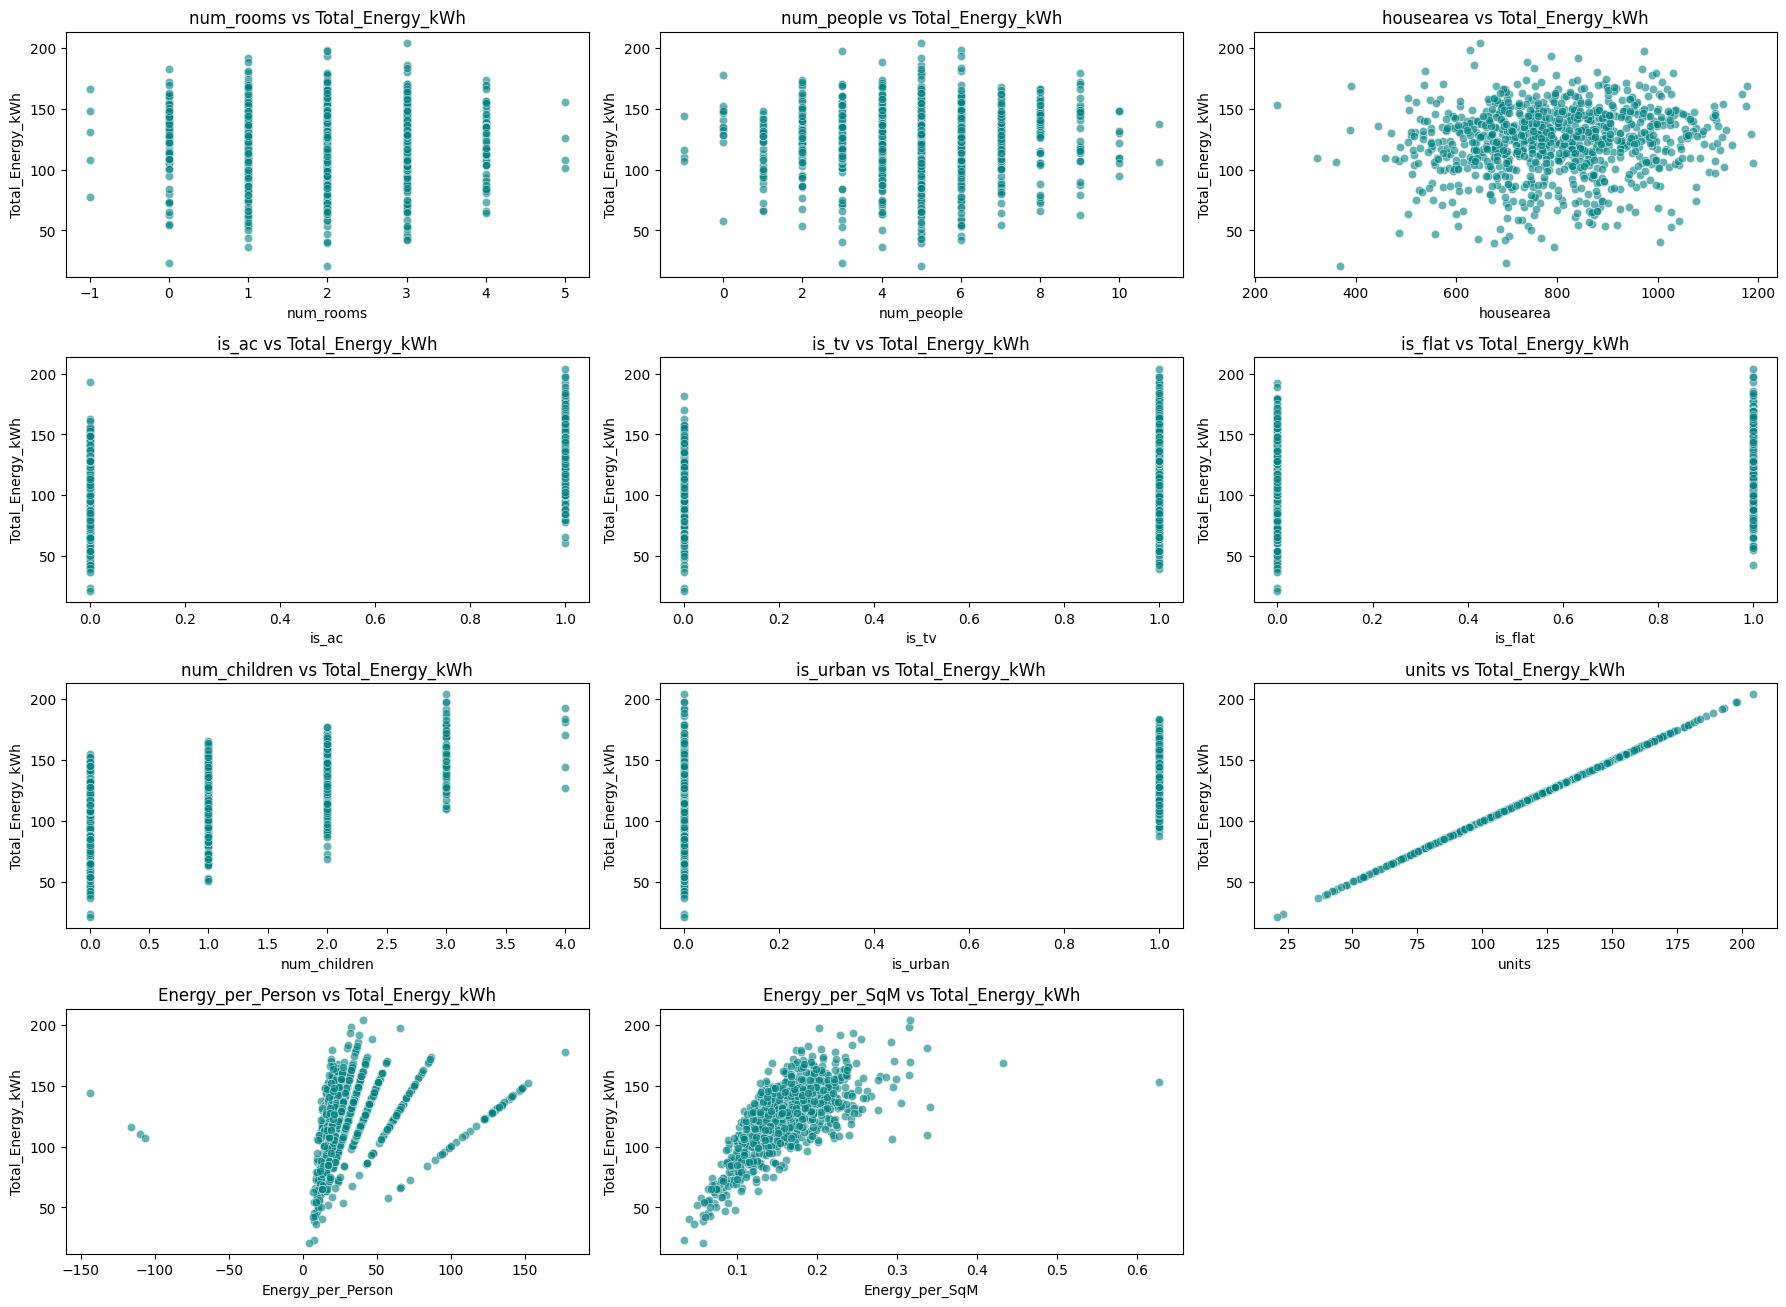

In [13]:
target = "Total_Energy_kWh"   # change if needed

plt.figure(figsize=(18, 16))
plot_idx = 1
for col in num_cols:
    if col != target:
        plt.subplot(5, 3, plot_idx)
        sns.scatterplot(x=df[col], y=df[target], alpha=0.6, color="teal")
        plt.title(f"{col} vs {target}")
        plot_idx += 1
plt.tight_layout()
plt.show()


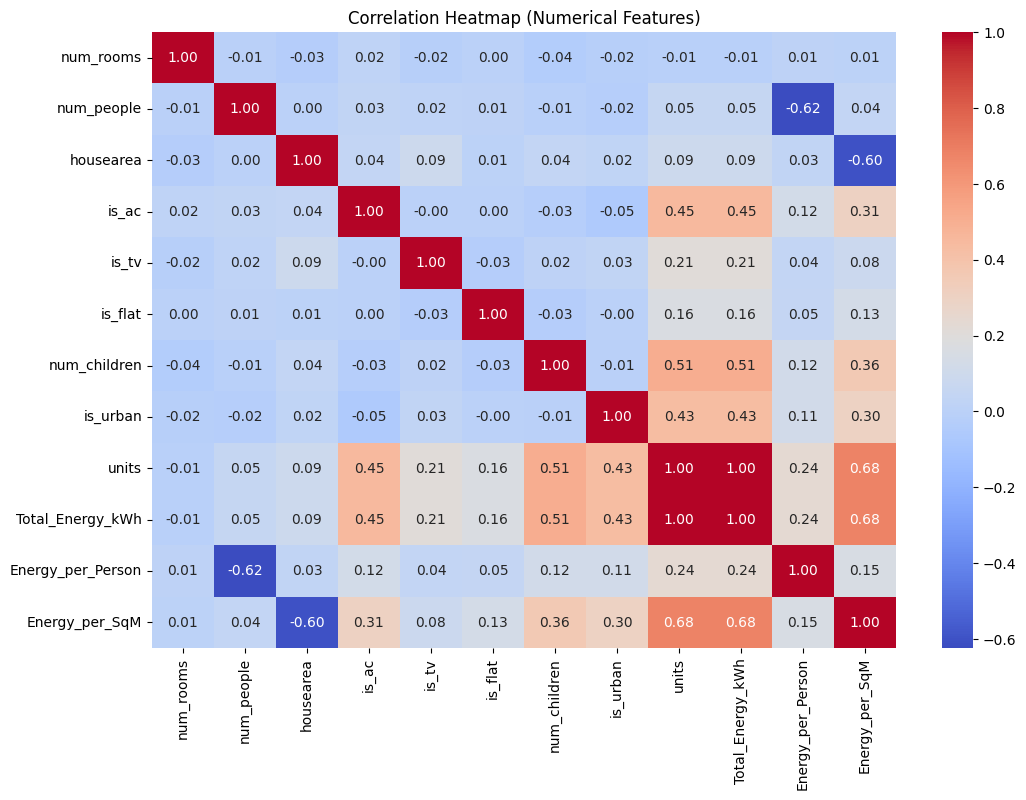

In [14]:
# 5. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [15]:
# --- Categorical Data Visualization ---
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="muted")
    plt.title(f"Count plot of {col}")
    plt.show()

    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()

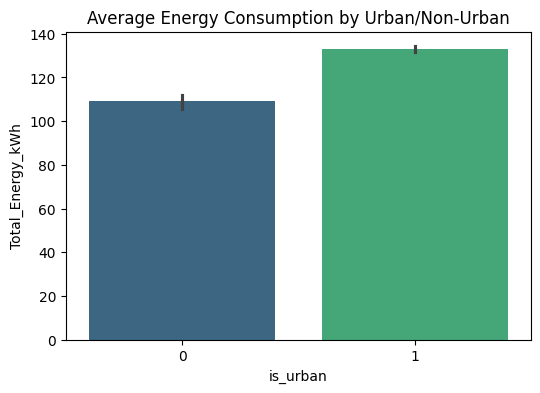

In [16]:
# Grouped bar: Average energy consumption by urban/rural
plt.figure(figsize=(6, 4))
sns.barplot(x="is_urban", y="Total_Energy_kWh", data=df, estimator=np.mean, palette="viridis")
plt.title("Average Energy Consumption by Urban/Non-Urban")
plt.show()

In [17]:
print("\n STEP 2: DATA PREPROCESSING")
print("-" * 40)


 STEP 2: DATA PREPROCESSING
----------------------------------------


In [18]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())




Missing values per column:
num_rooms            0
num_people           0
housearea            0
is_ac                0
is_tv                0
is_flat              0
num_children         0
is_urban             0
units                0
Total_Energy_kWh     0
Energy_per_Person    0
Energy_per_SqM       0
dtype: int64


In [19]:
# Handle missing values (if any)
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Data preprocessing completed!")

Data preprocessing completed!


In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nShape before handling outliers:", df.shape)


Shape before handling outliers: (1000, 12)



STEP 5: VISUALIZATION BEFORE OUTLIER REMOVAL
--------------------------------------------------


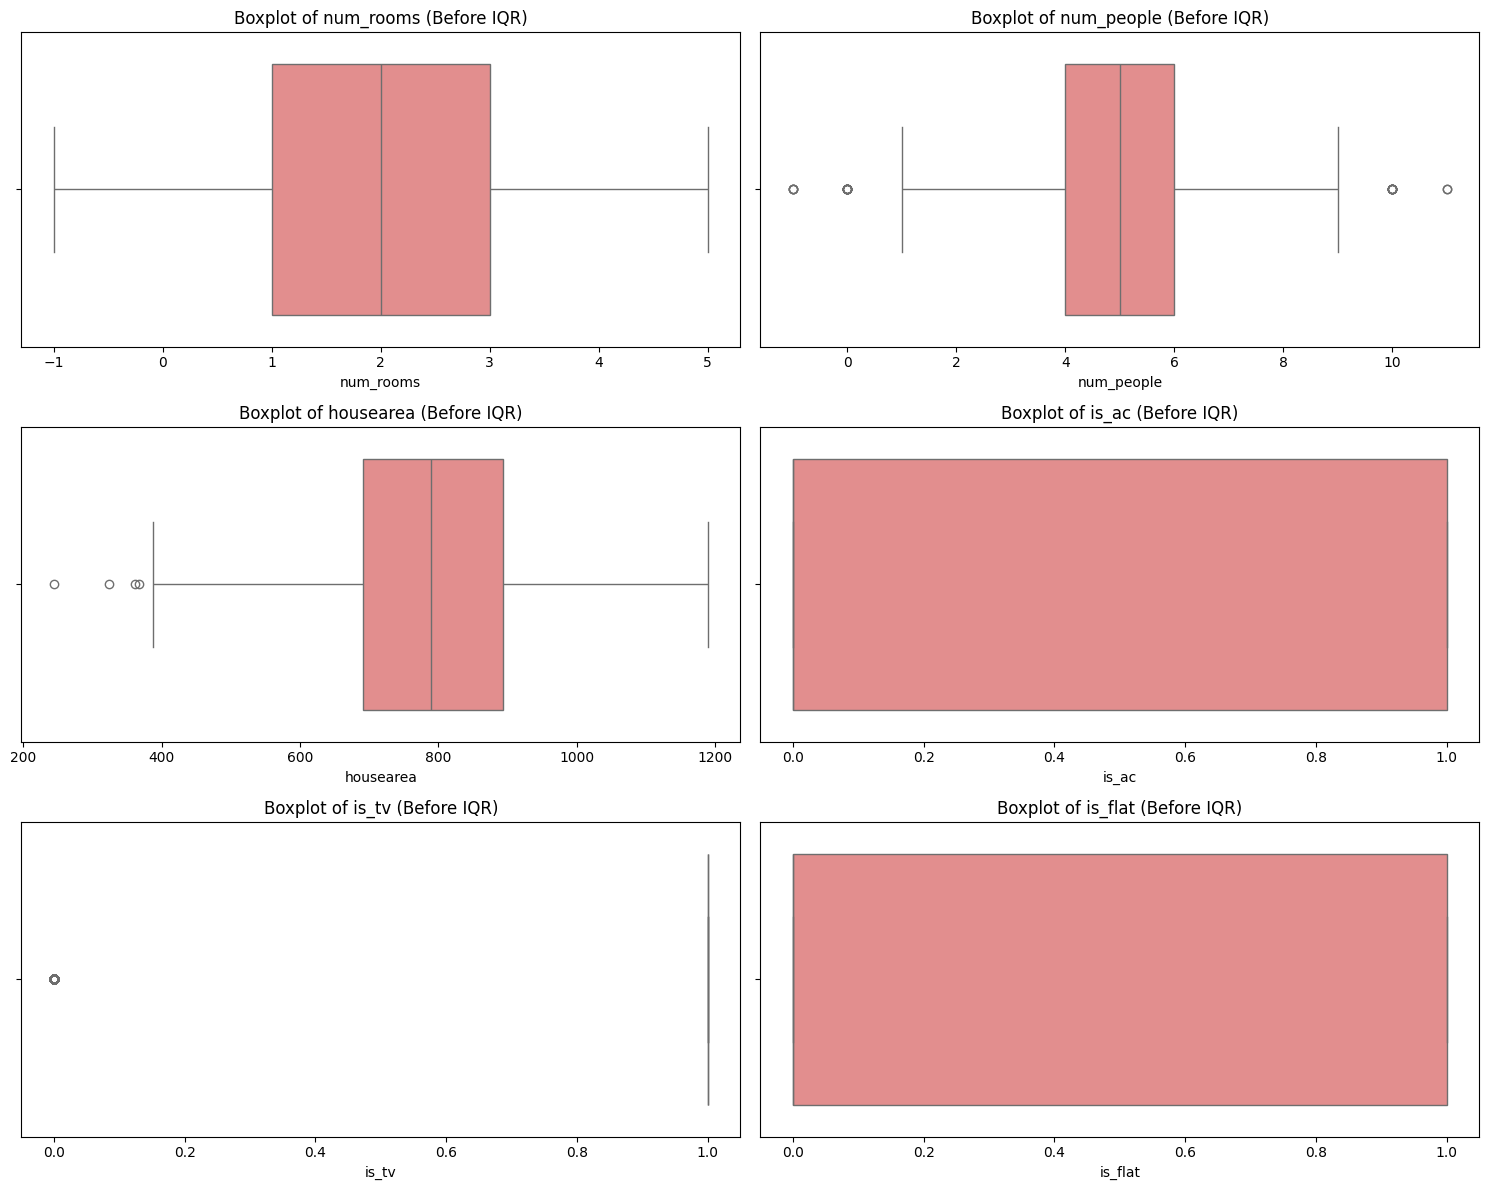

In [21]:
print("\nSTEP 5: VISUALIZATION BEFORE OUTLIER REMOVAL")
print("-"*50)

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col} (Before IQR)")
plt.tight_layout()
plt.show()

In [22]:
# ============================================================
# STEP 6: OUTLIER REMOVAL (IQR METHOD)
# ============================================================
print("\nSTEP 6: OUTLIER REMOVAL USING IQR")
print("-"*50)

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


STEP 6: OUTLIER REMOVAL USING IQR
--------------------------------------------------
Shape before outlier removal: (1000, 12)
Shape after outlier removal: (685, 12)



STEP 7: VISUALIZATION AFTER OUTLIER REMOVAL
--------------------------------------------------


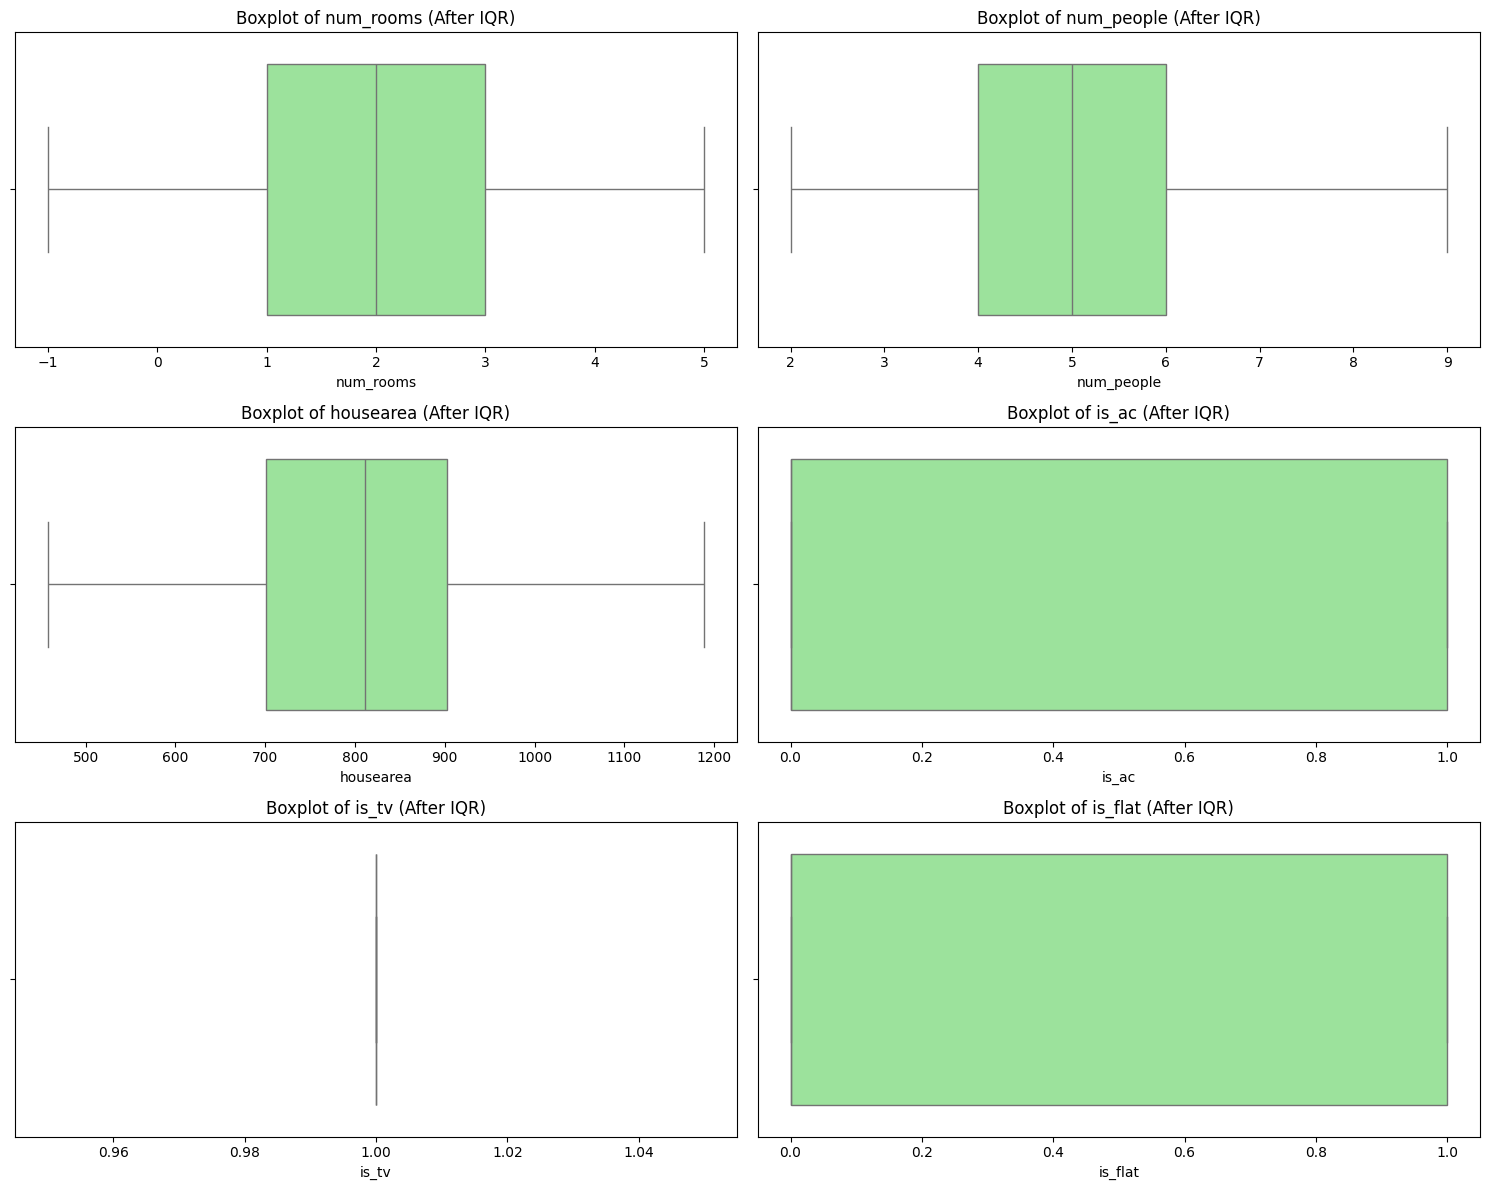

In [23]:
# ============================================================
# STEP 7: VISUALIZATION AFTER OUTLIER REMOVAL
# ============================================================
print("\nSTEP 7: VISUALIZATION AFTER OUTLIER REMOVAL")
print("-"*50)

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_clean[col], color="lightgreen")
    plt.title(f"Boxplot of {col} (After IQR)")
plt.tight_layout()
plt.show()

In [24]:
# ============================================================
# PART 2: REGRESSION - Linear Regression Model
# ============================================================

In [25]:

from sklearn.feature_selection import SelectKBest, f_regression

y = df_clean['units'].copy()

# 1) Defensive: drop any columns that were derived from the target (leakage)
leakage_candidates = ['Total_Energy_kWh', 'Energy_per_Person', 'Energy_per_SqM']
cols_to_drop = [c for c in leakage_candidates if c in df_clean.columns]
print("Dropping leakage columns (if present):", cols_to_drop)

X_raw = df_clean.drop(columns=['units'] + cols_to_drop, errors='ignore').copy()
# 2) One-hot encode categorical vars (necessary for SelectKBest)
X_encoded = pd.get_dummies(X_raw, drop_first=True)


print("Final number of features used for selection:", X_encoded.shape[1])


Dropping leakage columns (if present): ['Total_Energy_kWh', 'Energy_per_Person', 'Energy_per_SqM']
Final number of features used for selection: 8


In [26]:
y.describe()

count    685.000000
mean     126.125592
std       23.918529
min       60.320028
25%      112.969864
50%      127.852426
75%      143.505600
max      188.857243
Name: units, dtype: float64

In [27]:
# 4) SelectKBest (rank all numeric features)
kbest = SelectKBest(score_func=f_regression, k='all')
kbest.fit(X_encoded.fillna(0), y.fillna(0))

feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F-Score': kbest.scores_
}).sort_values(by='F-Score', ascending=False)

print("\nTop features by F-Score:\n", feature_scores.head(10))

# Choose top 5 (or choose a different k)
selected_features_kbest = feature_scores.head(5)['Feature'].tolist()
print("\nSelected features (top 5):", selected_features_kbest)

X_selected = X_encoded[selected_features_kbest]



Top features by F-Score:
         Feature     F-Score
6  num_children  208.863404
7      is_urban  192.172282
3         is_ac  173.097043
2     housearea   13.252839
5       is_flat   10.755704
1    num_people    8.327378
0     num_rooms    0.734963
4         is_tv    0.000000

Selected features (top 5): ['num_children', 'is_urban', 'is_ac', 'housearea', 'is_flat']


In [28]:
# 5) Train/test split, scale, fit
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Results : MSE = {mse:.6f}, R² = {r2:.6f}")



Linear Regression Results : MSE = 145.171697, R² = 0.735907


In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)
y_pred_ridge = ridge.predict(X_test_s)

print("Ridge Regression (scaled data):")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("-"*50)



Ridge Regression (scaled data):
R² Score: 0.7360142197560733
MSE: 145.11256171124953
--------------------------------------------------


In [30]:
from sklearn.linear_model import Lasso

# Lasso Regression on scaled data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_s, y_train)
y_pred_lasso = lasso.predict(X_test_s)

print("Lasso Regression (scaled data):")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("-"*50)



Lasso Regression (scaled data):
R² Score: 0.7364254055229184
MSE: 144.88653355203977
--------------------------------------------------


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Apply polynomial to SCALED features (like you did for linear)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_s)  # Use scaled!
X_test_poly = poly.transform(X_test_s)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression (on scaled features):")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression (on scaled features):
R² Score: 0.7499251867520378
MSE: 137.46572537483857


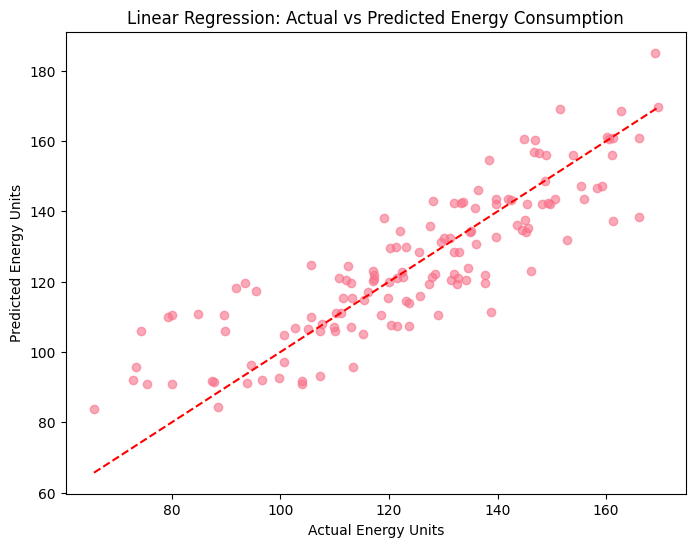

In [32]:
# --- 7. Plot predictions vs actual ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Energy Units')
plt.ylabel('Predicted Energy Units')
plt.title('Linear Regression: Actual vs Predicted Energy Consumption')
plt.show()


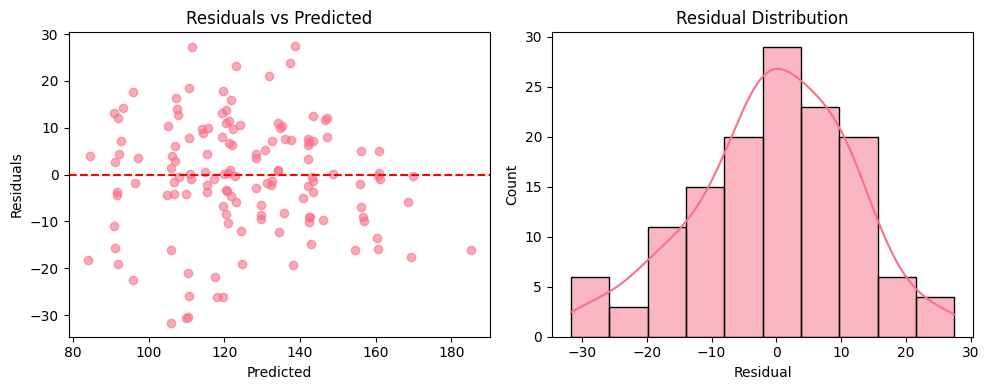

MAE: 9.38815123358042
RMSE: 12.048721814072021


In [33]:
# --- 8. Residual analysis ---
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

print("MAE:", np.mean(np.abs(residuals)))
print("RMSE:", np.sqrt(np.mean(residuals**2)))

In [34]:
# --- 9. Model coefficients ---
coefficients = pd.DataFrame({
    'Feature': selected_features_kbest,
    'Coefficient': lr.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
        Feature  Coefficient
0  num_children    12.476505
1      is_urban    11.377688
2         is_ac    12.898193
3     housearea     0.838418
4       is_flat     4.132812


In [35]:
from sklearn.ensemble import RandomForestRegressor

# # Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("-"*50)


Random Forest Regression:
R² Score: 0.6339767363605903
MSE: 201.20240333986234
--------------------------------------------------


In [36]:
# ============================================================
# PART 3: CLASSIFICATION
# ============================================================
print("\n" + "="*70)
print("PART 3: CLASSIFICATION - Energy Efficiency Prediction")
print("="*70)

# Create binary target for classification based on Energy Intensity threshold
threshold = df_clean['Energy_per_SqM'].median()
df_clean['Efficiency_Class'] = (df_clean['Energy_per_SqM'] > threshold).astype(int)  
# 0 = Efficient, 1 = Inefficient

# Prepare features for classification
X_clf = df_clean.drop(columns=[
    'units', 
    'Total_Energy_kWh', 
    'Energy_per_Person', 
    'Energy_per_SqM',
    'Efficiency_Class'
])

y_clf = df_clean['Efficiency_Class']

# Split the data - 80% train, 20% test, stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Standard scaling fitted only on train data
scaler_clf = StandardScaler()
X_train_scaled = scaler_clf.fit_transform(X_train)
X_test_scaled = scaler_clf.transform(X_test)

# Import additional classifiers for comprehensive comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")
print(f"Class distribution (0=Efficient, 1=Inefficient):")
print(y_train.value_counts().sort_index())


PART 3: CLASSIFICATION - Energy Efficiency Prediction

Training set shape: (548, 8)
Testing set shape: (137, 8)
Class distribution (0=Efficient, 1=Inefficient):
Efficiency_Class
0    274
1    274
Name: count, dtype: int64


**CLUSTERING**


PART 4: CLUSTERING - Household Energy Patterns

Clustering data shape: (685, 3)

--------------------------------------------------
K-Means Clustering
--------------------------------------------------
Silhouette Score: 0.3081
Davies-Bouldin Index: 1.1637

--------------------------------------------------
Hierarchical Clustering (Ward)
--------------------------------------------------
Silhouette Score: 0.3108
Davies-Bouldin Index: 1.0166


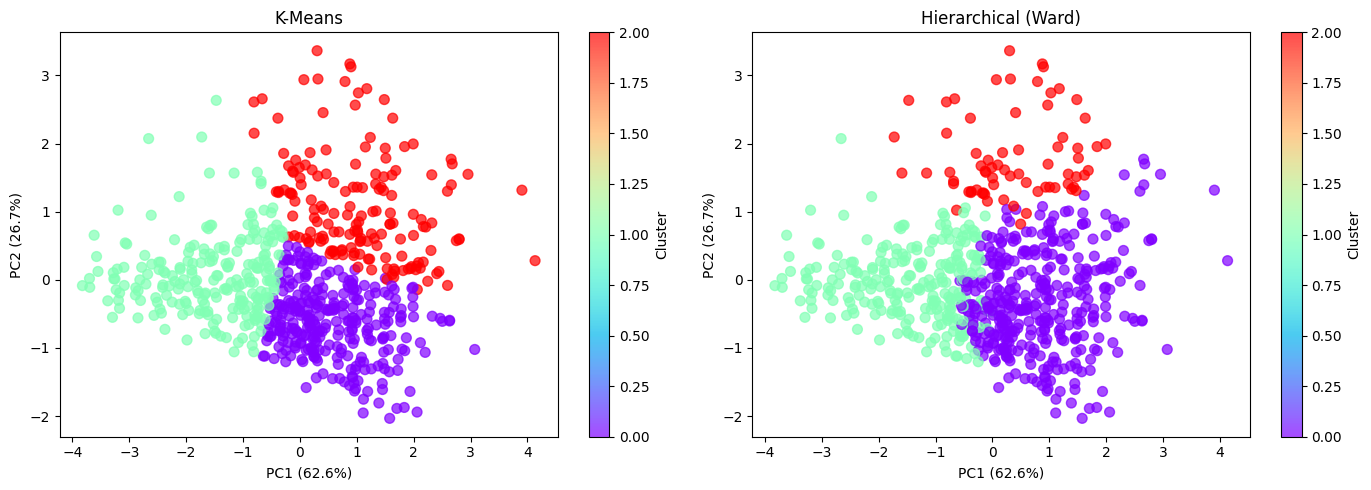


--------------------------------------------------
K-Means Cluster Profiles
--------------------------------------------------

Energy_per_Person by Cluster:
                 mean   std    min    max
KMeans_Cluster                           
0               23.50  4.78  13.77  34.21
1               20.29  6.44   8.22  43.43
2               40.68  6.94  30.82  58.78

Energy_per_SqM by Cluster:
                mean   std   min   max
KMeans_Cluster                        
0               0.18  0.03  0.13  0.27
1               0.12  0.02  0.06  0.18
2               0.17  0.03  0.11  0.26

Total_Energy_kWh by Cluster:
                  mean    std     min     max
KMeans_Cluster                               
0               138.27  14.55  104.13  183.81
1               102.17  18.25   60.32  136.01
2               136.83  19.76   86.67  188.86

--------------------------------------------------
Clustering Method Comparison
--------------------------------------------------
      Method  Si

In [37]:
# ============================================================
# PART 4: CLUSTERING ANALYSIS
# ============================================================
print("\n" + "="*70)
print("PART 4: CLUSTERING - Household Energy Patterns")
print("="*70)

# Use cleaned data and already-engineered features
cluster_cols = ['Energy_per_Person', 'Energy_per_SqM', 'Total_Energy_kWh']
X_cluster = df_clean[cluster_cols].copy()

print(f"\nClustering data shape: {X_cluster.shape}")

# Scale features
scaler_clust = StandardScaler()
X_cluster_scaled = scaler_clust.fit_transform(X_cluster)

# CLUSTERING METHODS

# ----- (A) K-MEANS -----
print("\n" + "-"*50)
print("K-Means Clustering")
print("-"*50)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_cluster_scaled)
sil_km = silhouette_score(X_cluster_scaled, labels_km)
db_km = davies_bouldin_score(X_cluster_scaled, labels_km)
print(f"Silhouette Score: {sil_km:.4f}")
print(f"Davies-Bouldin Index: {db_km:.4f}")

# ----- (B) HIERARCHICAL CLUSTERING -----
print("\n" + "-"*50)
print("Hierarchical Clustering (Ward)")
print("-"*50)
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hc = hier.fit_predict(X_cluster_scaled)
sil_hc = silhouette_score(X_cluster_scaled, labels_hc)
db_hc = davies_bouldin_score(X_cluster_scaled, labels_hc)
print(f"Silhouette Score: {sil_hc:.4f}")
print(f"Davies-Bouldin Index: {db_hc:.4f}")

# VISUALIZE RESULTS (PCA projection for clarity)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X_cluster_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
for ax, labels, title in zip(
    axes,
    [labels_km, labels_hc],
    ['K-Means', 'Hierarchical (Ward)']
):
    scatter = ax.scatter(proj[:,0], proj[:,1], c=labels, cmap='rainbow', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.show()

# Cluster analysis for K-Means
df_clean['KMeans_Cluster'] = labels_km
print("\n" + "-"*50)
print("K-Means Cluster Profiles")
print("-"*50)
for col in cluster_cols:
    print(f"\n{col} by Cluster:")
    print(df_clean.groupby('KMeans_Cluster')[col].agg(['mean', 'std', 'min', 'max']).round(2))

# Comparison summary
summary = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [sil_km, sil_hc],
    'Davies-Bouldin Index': [db_km, db_hc]
})
print("\n" + "-"*50)
print("Clustering Method Comparison")
print("-"*50)
print(summary.to_string(index=False))